In [196]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from tabulate import tabulate
import matplotlib.pyplot as plt

In [197]:
X = np.arange(0, 1000, 0.002)
y_clean = np.sin(1 * X) + np.sin(1 * X)
noise = np.random.uniform(-0.1, 1, size=X.shape)
y_noisy = y_clean + noise


X1 = X
X2 = np.sin(X)
#X3 = np.cos(X)
#X4 = np.sin(2 * X)
#X5 = np.cos(2 * X)
#X6 =np.sin(3 * X)
#X7 =np.cos(3 * X)
#X8 = np.cos(4 * X)
#X9 = np.cos(4 * X)
X_multi = np.column_stack((X1,X2))


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_noisy, train_size=0.8, shuffle=False)

In [199]:
model_linear = LinearRegression()

model_linear.fit(X_train, y_train)

y_pred_train_linear = model_linear.predict(X_train)
y_pred_test_linear = model_linear.predict(X_test)

start_time = time.time()
model_linear.fit(X_train, y_train)
end_time = time.time()
train_duration_linear = end_time - start_time

start_time = time.time()
y_pred_train_linear = model_linear.predict(X_train)
y_pred_test_linear = model_linear.predict(X_test)
end_time = time.time()
predict_duration_linear = end_time - start_time

mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)

sse_train_linear = mse_train_linear * len(y_train)
sse_test_linear = mse_test_linear * len(y_test)


In [200]:
model_ridge = Ridge(alpha=0.001)


start_time = time.time()
model_ridge.fit(X_train, y_train)
end_time = time.time()
train_duration_ridge = end_time - start_time

start_time = time.time()
y_pred_train_ridge = model_ridge.predict(X_train)
y_pred_test_ridge = model_ridge.predict(X_test)
end_time = time.time()
predict_duration_ridge = end_time - start_time

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)

sse_train_ridge = np.sum((y_pred_train_ridge - y_train) ** 2)
sse_test_ridge = np.sum((y_pred_test_ridge - y_test) ** 2)

model_lasso = Lasso(alpha=0.001)

start_time = time.time()
model_lasso.fit(X_train, y_train)
end_time = time.time()
train_duration_lasso = end_time - start_time

start_time = time.time()
y_pred_train_lasso = model_lasso.predict(X_train)
y_pred_test_lasso = model_lasso.predict(X_test)
end_time = time.time()
predict_duration_lasso = end_time - start_time

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)

sse_train_lasso = np.sum((y_pred_train_lasso - y_train) ** 2)
sse_test_lasso = np.sum((y_pred_test_lasso - y_test) ** 2)


In [201]:
model_elastic = ElasticNet(alpha=0.001, l1_ratio=0.5)

start_time = time.time()
model_elastic.fit(X_train, y_train)
end_time = time.time()
train_duration_elastic = end_time - start_time

start_time = time.time()
y_pred_train_elastic = model_elastic.predict(X_train)
y_pred_test_elastic = model_elastic.predict(X_test)
end_time = time.time()
predict_duration_elastic = end_time - start_time

mse_train_elastic = mean_squared_error(y_train, y_pred_train_elastic)
mse_test_elastic = mean_squared_error(y_test, y_pred_test_elastic)

sse_train_elastic = np.sum((y_pred_train_elastic - y_train) ** 2)
sse_test_elastic = np.sum((y_pred_test_elastic - y_test) ** 2)


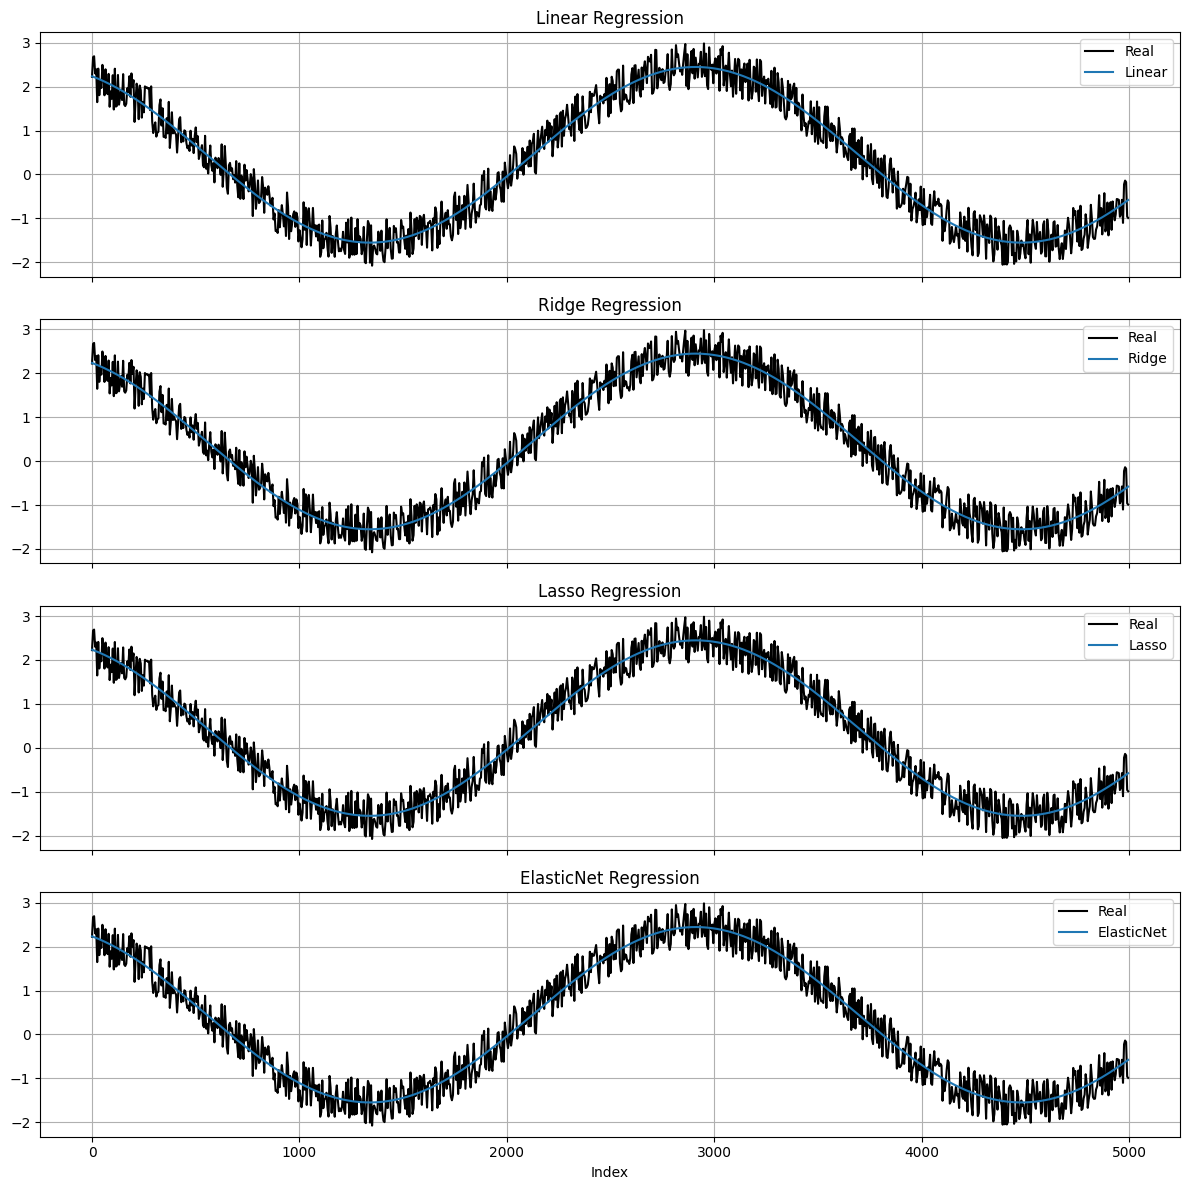

In [203]:
sample = np.arange(0, 5000, 5)

model_names = ["Linear", "Ridge", "Lasso", "ElasticNet"]
model_prediction = [y_pred_test_linear, y_pred_test_ridge, y_pred_test_lasso, y_pred_test_elastic]

fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

for i in range(4):
    axes[i].plot(sample, y_test[sample], label="Real", color='black')
    axes[i].plot(sample, model_prediction[i][sample], label=model_names[i])
    axes[i].set_title(f"{model_names[i]} Regression")
    axes[i].legend()
    axes[i].grid(True)

plt.xlabel("Index")
plt.tight_layout()
plt.show()
